# EXPLORATORY DATA ANLYSIS

In [20]:
# Import libraries
import pandas as pd
import seaborn as sns                      
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import dataset
df = pd.read_excel("clean_songs_en_fr_sp.xlsx")
df.head()

,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


In [4]:
# Obtain information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              787 non-null    object 
 1   artist            787 non-null    object 
 2   duration          787 non-null    int64  
 3   popularity        787 non-null    int64  
 4   danceability      787 non-null    float64
 5   acousticness      787 non-null    float64
 6   energy            787 non-null    float64
 7   instrumentalness  787 non-null    float64
 8   liveness          787 non-null    float64
 9   loudness          787 non-null    float64
 10  speechiness       787 non-null    float64
 11  tempo             787 non-null    float64
 12  valence           787 non-null    float64
 13  language          787 non-null    object 
 14  Polarity          787 non-null    float64
 15  Subjectivity      787 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory u

In [5]:
# Display statistics
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.describe())

           duration  popularity  danceability  acousticness      energy  \
count  7.870000e+02  787.000000    787.000000    787.000000  787.000000   
mean   2.292990e+05   42.327827      0.551030      0.465548    0.494212   
std    8.743832e+04   32.387433      0.163322      0.368323    0.270034   
min    7.940000e+04    0.000000      0.000000      0.000008    0.006770   
25%    1.778880e+05    0.000000      0.444000      0.076150    0.261000   
50%    2.101730e+05   50.000000      0.557000      0.472000    0.481000   
75%    2.573465e+05   71.500000      0.670000      0.841000    0.741000   
max    1.121253e+06   97.000000      0.951000      0.995000    0.980000   

       instrumentalness    liveness    loudness  speechiness       tempo  \
count        787.000000  787.000000  787.000000   787.000000  787.000000   
mean           0.089315    0.172426   -9.963565     0.055607  117.799234   
std            0.228415    0.139987    5.000755     0.050965   29.469143   
min            0.000

In [8]:
# Remove duplicates
duplicates = df[df.duplicated(keep='first')]
print("Duplicate rows:")
print(duplicates)
df[df.duplicated()].shape
# NO DUPLICATES LEFT FROM PRE-PROCESSING

Duplicate rows:
Empty DataFrame
Columns: [name, artist, duration, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, language, Polarity, Subjectivity]
Index: []


(0, 16)

In [10]:
# Iterate through each column and check if it has only one unique value
unary_columns = []
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values == 1:
        unary_columns.append(column)

if unary_columns:
    print("Unary columns found:", unary_columns)
else:
    print("No unary columns found in the dataset.")

No unary columns found in the dataset.


In [12]:
# Check for null values
print(df.isnull().sum())
# NO NULL CELLS

name                0
artist              0
duration            0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
language            0
Polarity            0
Subjectivity        0
dtype: int64


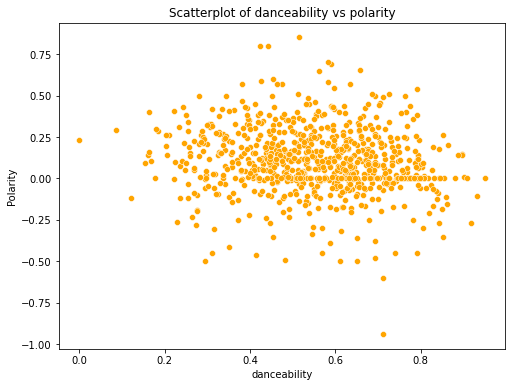

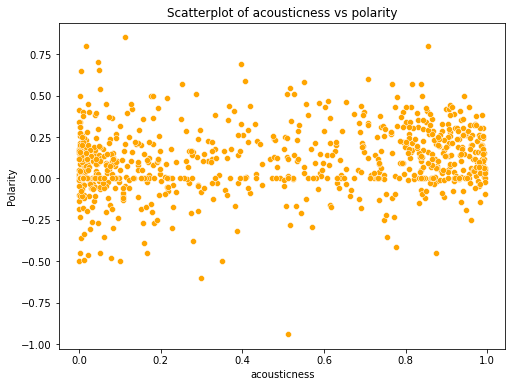

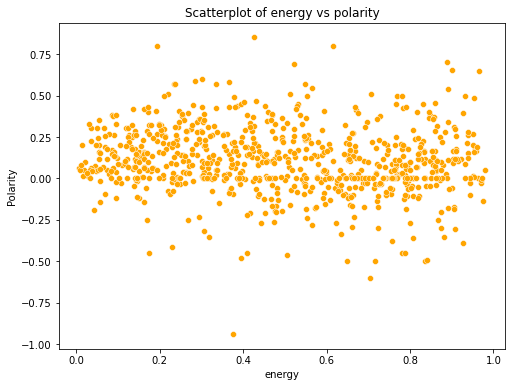

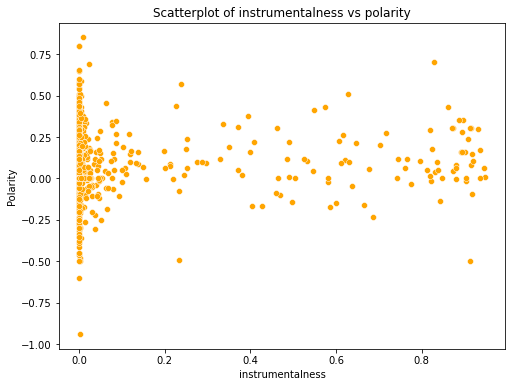

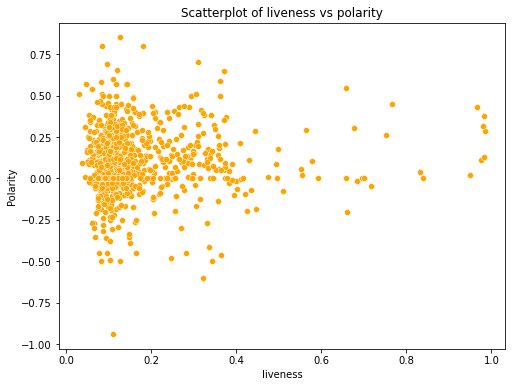

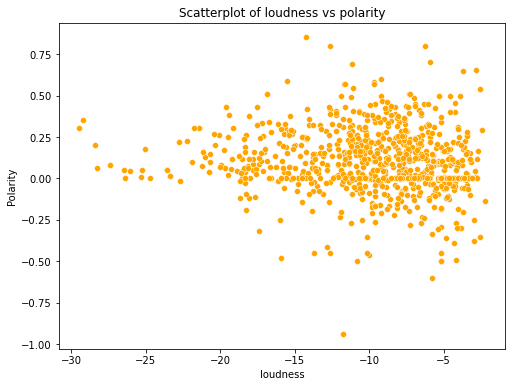

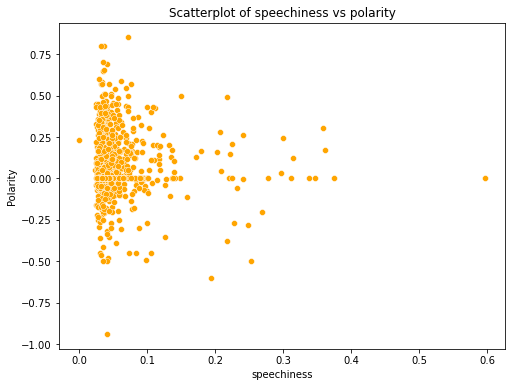

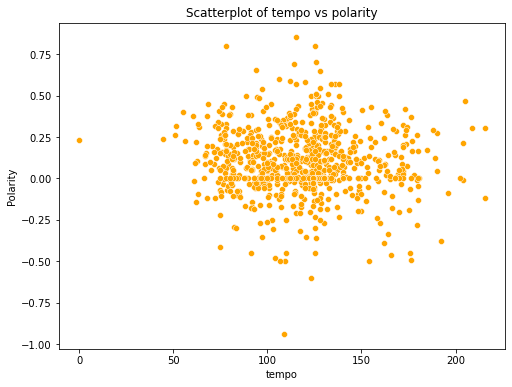

In [13]:
# Use float predictors 
predictors = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=predictor, y="Polarity", data=df, color='orange')
    plt.title(f"Scatterplot of {predictor} vs polarity")
    plt.xlabel(predictor)
    plt.ylabel("Polarity")
    plt.show()


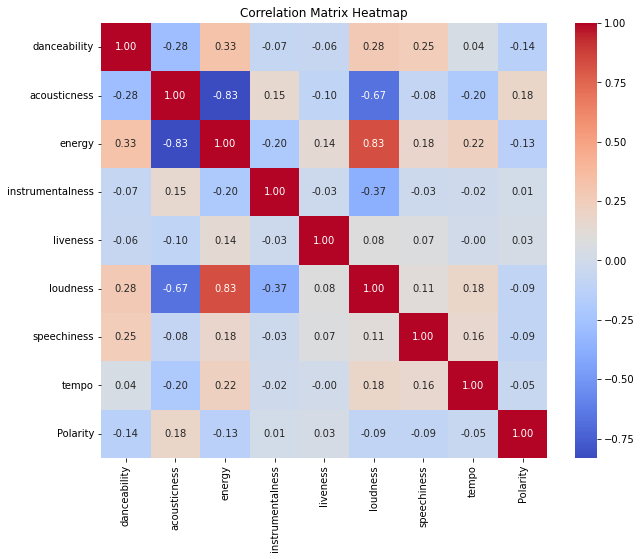

In [14]:
# Create a heatmap
# changed popularity with Polarity
correlation_matrix = df[predictors + ["Polarity"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

                  danceability  acousticness    energy  instrumentalness  \
danceability          1.000000     -0.284312  0.327054         -0.071053   
acousticness         -0.284312      1.000000 -0.831760          0.153940   
energy                0.327054     -0.831760  1.000000         -0.196419   
instrumentalness     -0.071053      0.153940 -0.196419          1.000000   
liveness             -0.063434     -0.098594  0.137713         -0.030056   
loudness              0.281451     -0.671621  0.832195         -0.372523   
speechiness           0.251825     -0.079051  0.177026         -0.030011   
tempo                 0.039939     -0.201502  0.224881         -0.015173   
Polarity             -0.141966      0.177471 -0.133262          0.007571   

                  liveness  loudness  speechiness     tempo  Polarity  
danceability     -0.063434  0.281451     0.251825  0.039939 -0.141966  
acousticness     -0.098594 -0.671621    -0.079051 -0.201502  0.177471  
energy            0.137

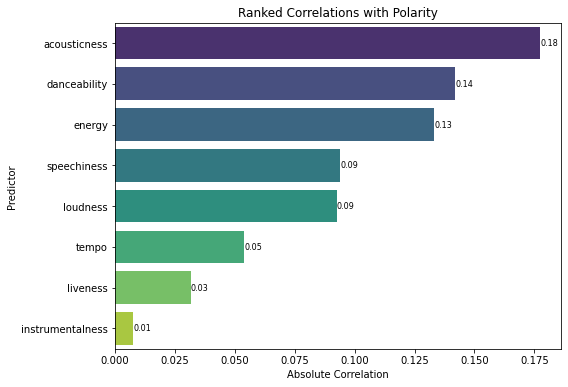

In [15]:
# Create a correlation matrix
correlation_matrix = df[predictors + ["Polarity"]].corr()

print(correlation_matrix)
# Extract and rank the correlations with 'popularity'
correlations_with_popularity = correlation_matrix["Polarity"].drop("Polarity")
ranked_correlations = correlations_with_popularity.abs().sort_values(ascending=False)

# Create a bar plot to visualize the ranked correlations
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=ranked_correlations.values, y=ranked_correlations.index, palette="viridis")
plt.title("Ranked Correlations with Polarity")
plt.xlabel("Absolute Correlation")
plt.ylabel("Predictor")

# Annotate the bars with the correlation values
for i, val in enumerate(ranked_correlations):
    barplot.text(val, i, f'{val:.2f}', va='center', color='black', fontsize=8)

plt.show()


Text(0.5, 1.0, 'Distribution of Polarity')

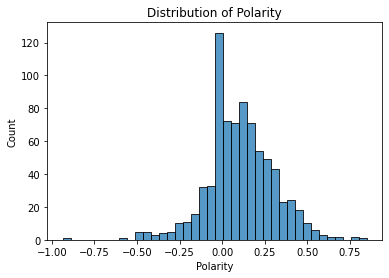

In [16]:
# Create a histogram of Polarity
sns.histplot(x = df['Polarity'])
plt.title("Distribution of Polarity")

count    787.000000
mean       0.105342
std        0.199222
min       -0.937500
25%        0.000000
50%        0.096159
75%        0.220922
max        0.850000
Name: Polarity, dtype: float64


<AxesSubplot:xlabel='Polarity'>

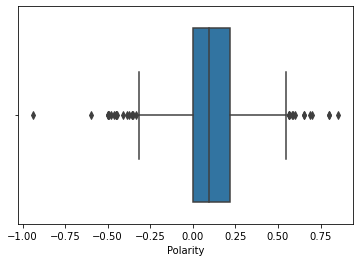

In [18]:
# Create a boxplot of Polarity
pop_summary = df['Polarity'].describe()
print(pop_summary)

sns.boxplot(x = df['Polarity'])

In [19]:
#Find multicollinearity
predictors = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[predictors]  # Select your predictors

vif = pd.DataFrame()
vif["Predictor"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif
#VIF over 5 or 10 means that it is multicollinear. I chose 10 for this case

,Predictor,VIF
0,danceability,16.706315
1,acousticness,5.939248
2,energy,12.781011
3,instrumentalness,1.359202
4,liveness,2.605122
5,loudness,10.438442
6,speechiness,2.416695
7,tempo,15.364767
8,valence,7.919912


In [21]:
#Use LASSO to reduce multicollinearity
predictors = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[predictors]
y = df['Polarity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha= 0.01)  # alpha can be adjusted
lasso.fit(X_train_scaled, y_train)

lasso_coefficients = lasso.coef_
print("Lasso Coefficients:", lasso_coefficients)

y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


#MSE1: 0.0379

Lasso Coefficients: [-0.01382212  0.01936176 -0.         -0.          0.          0.
 -0.00054594 -0.          0.        ]
Mean Squared Error: 0.03789978505922462


In [22]:
#Drop danceability
predictors = ['acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','valence']
X = df[predictors]  # Select your predictors

vif = pd.DataFrame()
vif["Predictor"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Predictor,VIF
0,acousticness,5.391783
1,energy,6.061228
2,instrumentalness,1.351757
3,liveness,2.584093
4,loudness,7.876726
5,speechiness,2.337521
6,valence,6.122068


In [105]:
#data.drop(columns=["time_signature", "valence", "language", "mode", "explicit", "disc"], inplace=True)

In [128]:
#data.to_excel("/Users/chiaralu/Downloads/clean_songs_en_fr_sp.xlsx", index=False)